In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv(r"FinalBalancedDataset.csv")
df

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation
...,...,...,...
56740,56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,56741,1,"you've gone and broke the wrong heart baby, an..."
56742,56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,56743,1,youu got wild bitches tellin you lies


In [8]:
df.isna().sum()

Unnamed: 0    0
Toxicity      0
tweet         0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56745 entries, 0 to 56744
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  56745 non-null  int64 
 1   Toxicity    56745 non-null  int64 
 2   tweet       56745 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.3+ MB


In [10]:
# Step 2: Convert text to Bag of Words and TF-IDF
X = df['tweet']
y = df['Toxicity']

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Bag of Words
count_vectorizer = CountVectorizer()
X_train_bow = count_vectorizer.fit_transform(X_train)
X_test_bow = count_vectorizer.transform(X_test)


In [13]:
# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [10]:
# Step 3: Apply prediction methods
# Initialize classifiers
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()
nb_classifier = MultinomialNB()
knn_classifier = KNeighborsClassifier()
svm_classifier = SVC()

classifiers = [dt_classifier, rf_classifier, nb_classifier, knn_classifier, svm_classifier]
classifier_names = ['decision-tree','Random-Forest','Navie-Bayes','K-NN', 'SVM']


Metrics for decision-tree with Bag of Words:
Precision: 0.9306334371754933
Recall: 0.9188025425466475
F1-Score: 0.9246801485761453
Confusion Matrix:
[[6138  334]
 [ 396 4481]]
ROC-AUC: 0.933597810210283


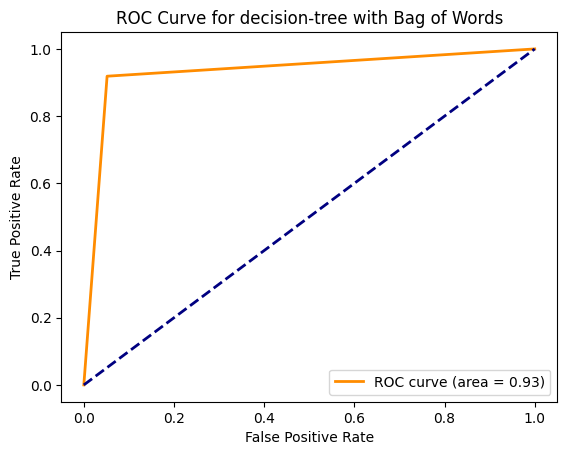


Metrics for decision-tree with TF-IDF:
Precision: 0.9129184637502568
Recall: 0.9114209555054337
F1-Score: 0.9121690950133389
Confusion Matrix:
[[6048  424]
 [ 432 4445]]
ROC-AUC: 0.9229539882595152


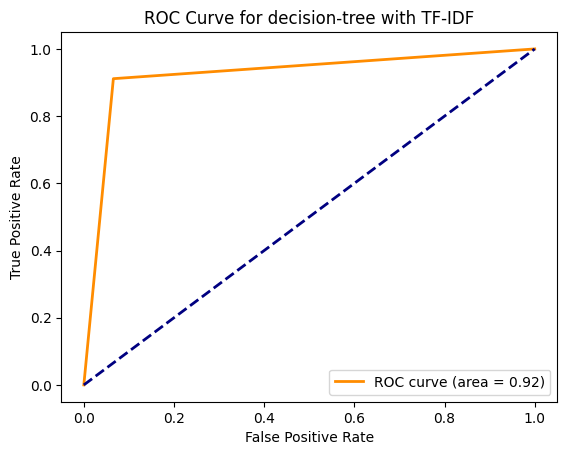


Metrics for Random-Forest with Bag of Words:
Precision: 0.9277335567658148
Recall: 0.9081402501537831
F1-Score: 0.9178323489793804
Confusion Matrix:
[[6127  345]
 [ 448 4429]]
ROC-AUC: 0.9274168494279422


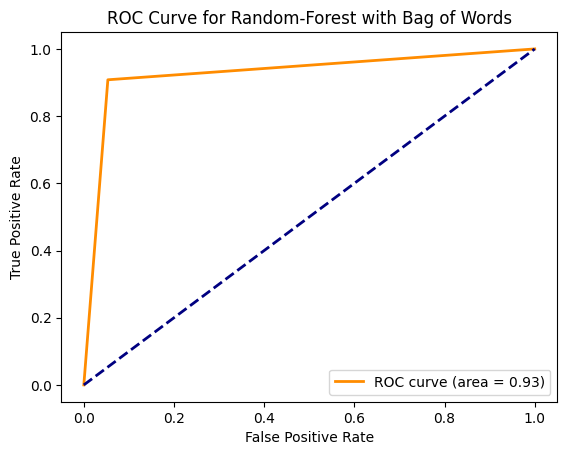


Metrics for Random-Forest with TF-IDF:
Precision: 0.9224532224532225
Recall: 0.9097806028296084
F1-Score: 0.9160730876432331
Confusion Matrix:
[[6099  373]
 [ 440 4437]]
ROC-AUC: 0.9260738613653604


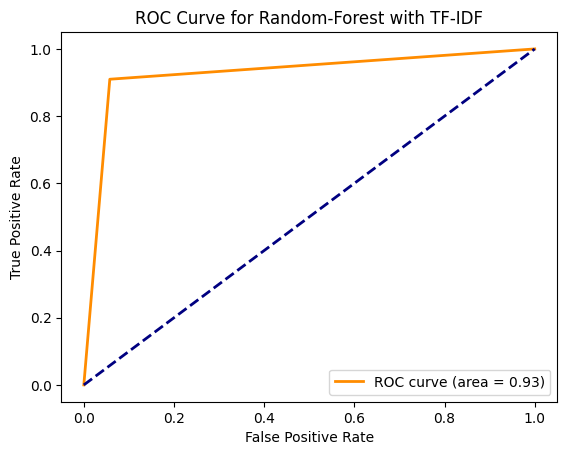


Metrics for Navie-Bayes with Bag of Words:
Precision: 0.8866810938422192
Recall: 0.9241336887430798
F1-Score: 0.9050200803212852
Confusion Matrix:
[[5896  576]
 [ 370 4507]]
ROC-AUC: 0.9175674624185114


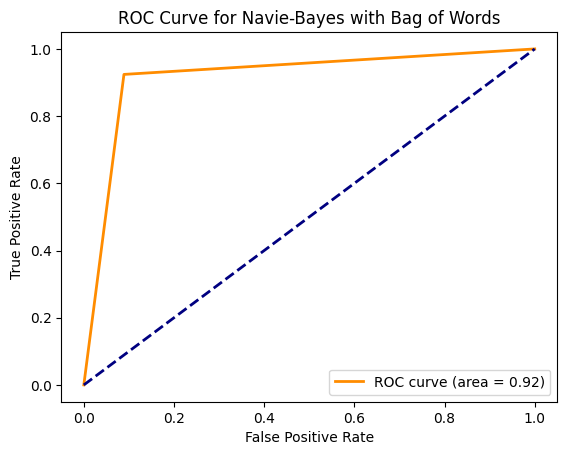


Metrics for Navie-Bayes with TF-IDF:
Precision: 0.9056408129406885
Recall: 0.895427516916137
F1-Score: 0.9005052067223426
Confusion Matrix:
[[6017  455]
 [ 510 4367]]
ROC-AUC: 0.9125623369500339


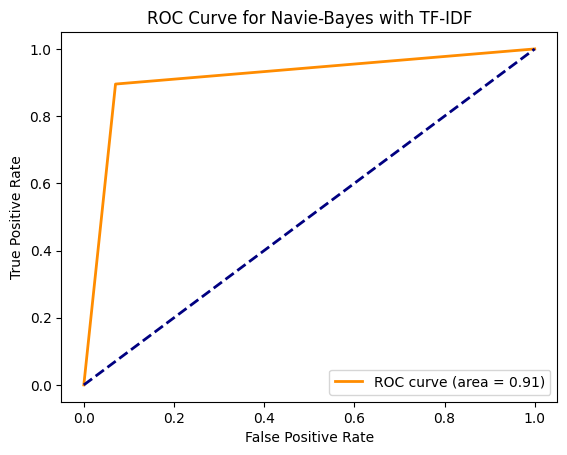


Metrics for K-NN with Bag of Words:
Precision: 0.8760027504011002
Recall: 0.7836784908755382
F1-Score: 0.8272727272727273
Confusion Matrix:
[[5931  541]
 [1055 3822]]
ROC-AUC: 0.8500438189853586


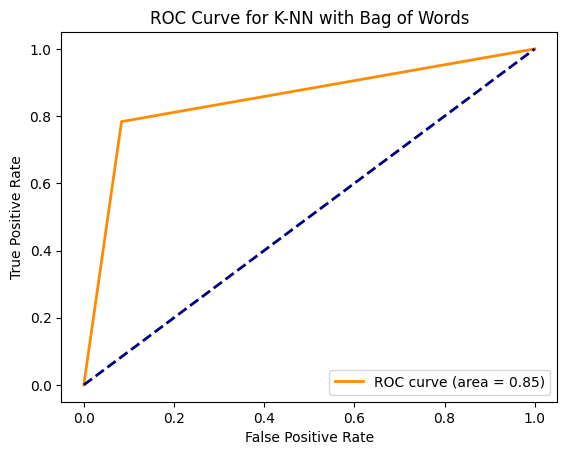


Metrics for K-NN with TF-IDF:
Precision: 0.8945011196815128
Recall: 0.7371334836989952
F1-Score: 0.808228417266187
Confusion Matrix:
[[6048  424]
 [1282 3595]]
ROC-AUC: 0.8358102523562961


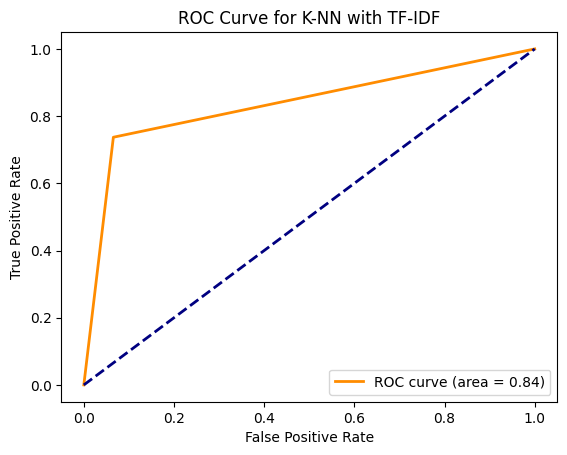


Metrics for SVM with Bag of Words:
Precision: 0.9644286349488662
Recall: 0.8894812384662703
F1-Score: 0.92544
Confusion Matrix:
[[6312  160]
 [ 539 4338]]
ROC-AUC: 0.9323796798017384


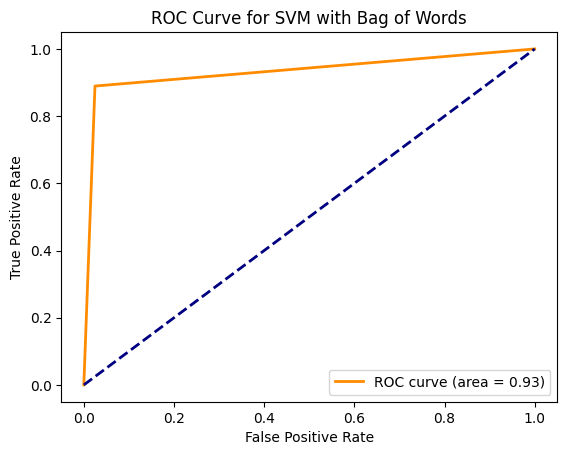


Metrics for SVM with TF-IDF:
Precision: 0.9600260699543776
Recall: 0.9060898093090014
F1-Score: 0.9322784810126582
Confusion Matrix:
[[6288  184]
 [ 458 4419]]
ROC-AUC: 0.9388298243083943


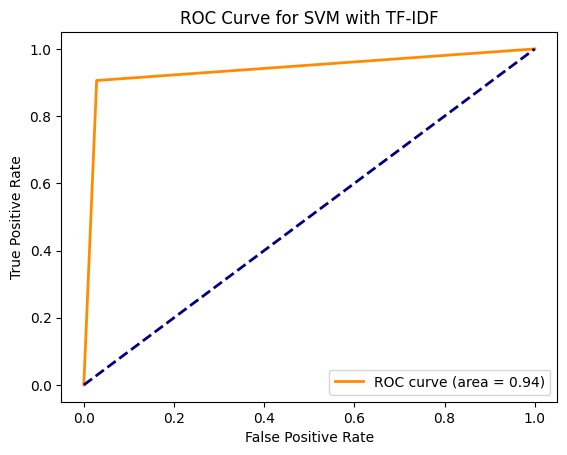

In [11]:
# Step 4: Evaluate metrics for each classifier and vectorizer
for i, classifier in enumerate(classifiers):
    # Bag of Words
    classifier.fit(X_train_bow, y_train)
    y_pred = classifier.predict(X_test_bow)

    print(f"\nMetrics for {classifier_names[i]} with Bag of Words:")
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-Score:", f1_score(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")

    print(cm)

    roc_auc = roc_auc_score(y_test, y_pred)
    print("ROC-AUC:", roc_auc)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {classifier_names[i]} with Bag of Words')
    plt.legend(loc="lower right")
    plt.show()

    # TF-IDF
    classifier.fit(X_train_tfidf, y_train)
    y_pred_tfidf = classifier.predict(X_test_tfidf)

    print(f"\nMetrics for {classifier_names[i]} with TF-IDF:")
    print("Precision:", precision_score(y_test, y_pred_tfidf))
    print("Recall:", recall_score(y_test, y_pred_tfidf))
    print("F1-Score:", f1_score(y_test, y_pred_tfidf))

    cm_tfidf = confusion_matrix(y_test, y_pred_tfidf)
    print("Confusion Matrix:")
    print(cm_tfidf)

    roc_auc_tfidf = roc_auc_score(y_test, y_pred_tfidf)
    print("ROC-AUC:", roc_auc_tfidf)

    # ROC Curve
    fpr_tfidf, tpr_tfidf, _ = roc_curve(y_test, y_pred_tfidf)
    plt.figure()
    plt.plot(fpr_tfidf, tpr_tfidf, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_tfidf))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {classifier_names[i]} with TF-IDF')
    plt.legend(loc="lower right")
    plt.show()